# Exercício 1
Treine modelos lineares na base <i>Portland_housePrices.csv</i> utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com <i>tamanho</i> ou com <i>número de quartos</i>?

2) O RSS e R^2 corroboram suas impressões observando o modelo?


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('Portland_housePrices.csv')

In [30]:
data.head()

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
tamanho    47 non-null int64
quartos    47 non-null int64
preco      47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


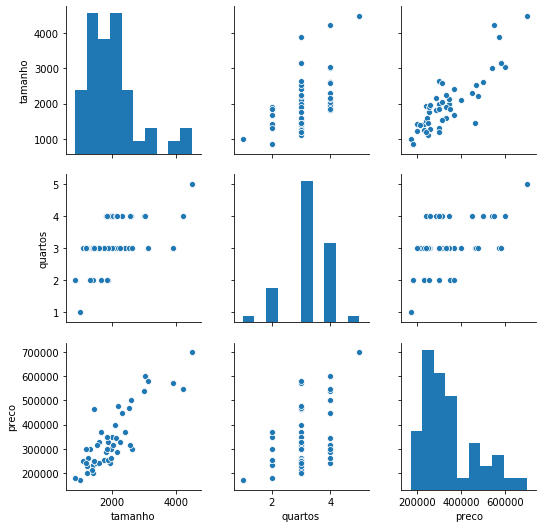

In [9]:
sns.pairplot(data)

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com tamanho ou com número de quartos?

O atributo que parece mais razoavel é o tamanho por preco, pois os dados podem ser distribuídos linearmente

In [55]:
X_test = pd.DataFrame(data.loc[:32,["tamanho"]])
y_test = pd.DataFrame(data.loc[:32,["preco"]])

In [60]:
X_train = pd.DataFrame(data.loc[32:,["tamanho"]])
y_train = pd.DataFrame(data.loc[32:,["preco"]])


In [62]:
from sklearn.linear_model import LinearRegression

ls = LinearRegression()

ls.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
y_predict = ls.predict(X_test)

y_predict

array([[44600195.49107749],
       [36811438.46877393],
       [41162015.60551777],
       [25918305.4332951 ],
       [60177709.53568459],
       [33473399.74492955],
       [35142419.10685174],
       [22246351.56910883],
       [23692946.28406552],
       [27086618.98664064],
       [26808337.82502948],
       [38714120.54136523],
       [36822453.99656262],
       [77980582.72952129],
       [29022681.44647038],
       [50163593.36415146],
       [33473399.74492955],
       [22346603.99878162],
       [55737895.49705665],
       [66753645.82165802],
       [28243805.74424002],
       [28477468.45490913],
       [27131126.16962523],
       [29022681.44647038],
       [63960820.08937489],
       [27910001.87185558],
       [51788105.54308905],
       [52288811.35166571],
       [52956419.09643459],
       [33473399.74492955],
       [39036797.61800352],
       [19008565.27493724],
       [35142419.10685174]])

In [70]:
from sklearn.metrics import r2_score

#determina o j(tetha) (soma do quadrado dos residuos)  slide 17
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
#Mede a proporção da variabilidade de Y que pode ser explicada por X.   
def calc_r2(y,predicted):
    return r2_score(predicted,y)

In [72]:
rss = calc_rss(y_test,ls.predict(X_test))
r2 = calc_r2(y_test,ls.predict(X_test))
print(rss)
print(r2)

5.618519118008198e+16
-7.253083131969563
